In [ ]:
import pandas as pd;
import numpy as np;
import matplotlib as mp;

In [ ]:
medical_df = pd.read_csv("/content/insurance.csv")

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px #gives interactive charts and save some coding

In [ ]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10,6) #only possible for matplotlib and seaborn , not for plotlib
plt.rcParams['figure.facecolor'] = '#00000000'


**Age**

Age is a numeric column. The minimum age in the dataset is 18 and max is 64. Thus we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We will use plotly to make the chart interactive , but you can create similar charts using Seaborn.

In [ ]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [ ]:
fig = px.histogram(medical_df, x="age",marginal="box",nbins=47,title="Distribution of age")
fig.update_layout(bargap=0.1)
fig.show()

**BMI Distribution**

In [ ]:
fig = px.histogram(medical_df,x="bmi",marginal="box",color_discrete_sequence=["red"],title="Distribution of BMI")
fig.update_layout(bargap=0.1)
fig.show()


In [ ]:
fig = px.histogram(medical_df,x="charges",marginal="box",color="smoker",title="Distribution of Charges factor like smoker or not")
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
fig = px.histogram(medical_df,x="charges",marginal="box",color="sex",title="Distribution of Charges factor like male or female")
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
fig = px.histogram(medical_df,x="charges",marginal="box",color="region",title="Distribution of Charges based on region")
fig.update_layout(bargap=0.2)
fig.show()

# **Smoker Column**

In [ ]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [ ]:
px.histogram(medical_df,x="smoker",color="sex",title="Smoker")

Having looked at the individual columns, we can now visualize teh relationship between "chrges" (the value we wish to predict) and other columns

In [ ]:
fig = px.scatter(medical_df,x="age",y="charges",opacity=0.8,color="smoker",hover_data=["sex","region"],title="Age vs Charges")
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.scatter(medical_df,x="bmi",y="charges",color="smoker",opacity=0.8,title="BMI vs Charges",hover_data=['sex'])
fig.update_layout(bargap=0.1)
fig.show()

**Relation between other columns like sex,region and children against charges**

In [ ]:
px.scatter(medical_df,x="children",y="charges") #cant judge how many properly , so take violin chart

In [ ]:
px.violin(medical_df,x="children",y="charges") #cant judge how many properly , so take violin chart

# ***Correlation***

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns.

Eg."age" and "charges" seem to grow together, where as "bmi" and "charges" dont.

This relationship is often expressed numerically using a measure called the correlation coefficient, which can be computed using the .corr method of Pandas series.

In [ ]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [ ]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [ ]:
medical_df.charges.corr(medical_df.children)

0.06799822684790478

In [ ]:
# medical_df.charges.corr(medical_df.smoker) #does not work for categoricl data

In [ ]:
medical_df.smoker

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [ ]:
smoker_values = {'no':0,'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values); # creating a new numeric column for smoker column
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [ ]:
smoker_numeric.corr(medical_df.charges)

0.7872514304984779

***How the correlation coefficients can be interpreted***

**Strength :** The greater the absolute value of the correlation coefficient, the stronger the relationship

-> The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variabe is accompined by a perfectly consistent change in the other.For these relationships, all the data points fall on a line. In practice, you wont see either type of perfect relationship.

->A coefficent of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either  increase or decrease.

->When the value is in between 0,+1 and -1, there is a relationship increses and the datapoints tend to fall closer to a line.

**Direction :**  The sign of the correlation coefficient represents the direction of the relationship.

->Positive coefficients indicates that when the value of one variable increses, the value of the other variable also tends to increase. Positive relationships produce an upward slope and a scatterplot.

->Negative coeeficients represents cases when the value of one variable increases, the value of the other variable tends to decrease.Negative relationships produce a downward slope.

Pandas dataframe also provide a .corr method to compute the correlation coefiicients b/w all pairs of numeric col

In [ ]:
# medical_df.corr()

This correlation matrix is often visualized using heatmap

In [ ]:
numeric_df = medical_df.select_dtypes(include=[float,int])
numeric_df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


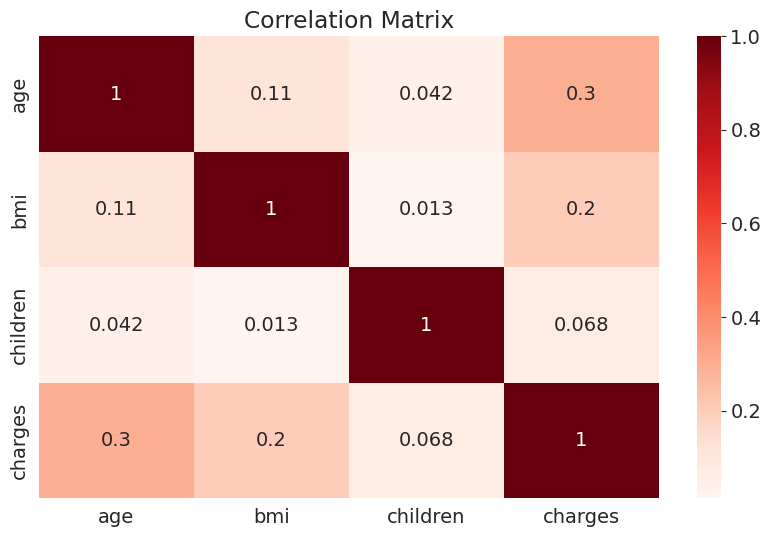

In [ ]:
sns.heatmap(numeric_df.corr(),cmap='Reds',annot=True)
plt.title("Correlation Matrix");

**Correlation and causation fallacy:**

Note that high correlation cannot be interpret a cause-effect relationship between features. Two features X and Y can be correlated if X causes Y or if Y causes X, or if both are caused independently by some other factor Z, and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that X and Y simply appear to be correlated because the sample is too small.

While this may seem obvious, computers can't diffrentiate between correlation and causation, and decisions based on automated system can often have amjor consequences on society.So it's important to study with automated systems lead to given result. Determining cause-effect relationshipsrequires human insight.



# **Linear Regression using a Single Feature**

We know that the "smoker" and "age" columns have the strongest correlation with "charges".Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers.First, let's create a data frame containing just the data for non-smokers.


In [ ]:
non_smoker_df = medical_df[medical_df.smoker=='no']

In [ ]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

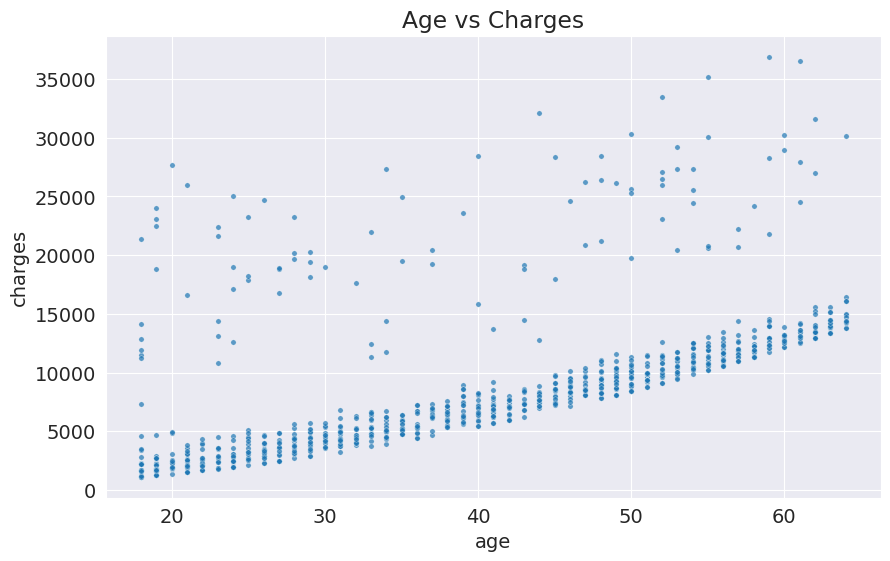

In [ ]:
plt.title("Age vs Charges")
sns.scatterplot(data=non_smoker_df,x="age",y="charges",alpha=0.7,s=15)

Apart from a few exceptions , the points seen to form a line. we will try to fit a line using these points, and use the line to predict charges for a given age. A line on the X and Y coordinates ahs the formula

y = wx + b

w = slope

b = intercept

# ***Model***

In the above case, the x axix shows "age" and the y-axis shows "charges". Thus we are assume the following relationship b/w the two:

charges = w x age + b

we will determine the w and b for the line best fits the data

->This technique is called linear regression , and we call the above eq a linear regression  model, because it models the relationship between age and charges as a stright line.

->The numbers w and b are called the parameters or weights of the model

->The values in the age of the datset are called the inputs to the model and the values in the charges are called "targets".

generally called as weight(w) and bias(b)

In [ ]:
def estimate_charges(age,w,b):
  return w*age+b #this function is our first model and let us guess the values of w and b and use then to estimate the va;lues for charges

In [ ]:
w=50
b=100

In [ ]:
estimate_charges(30,w,b) #very low, worst prediction

1600

In [ ]:
estimate_charges(40,w,b)

2100

In [ ]:
ages = non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [ ]:
estimated_charges = estimate_charges(ages,w,b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [ ]:
# compare the prediction with actual charges
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

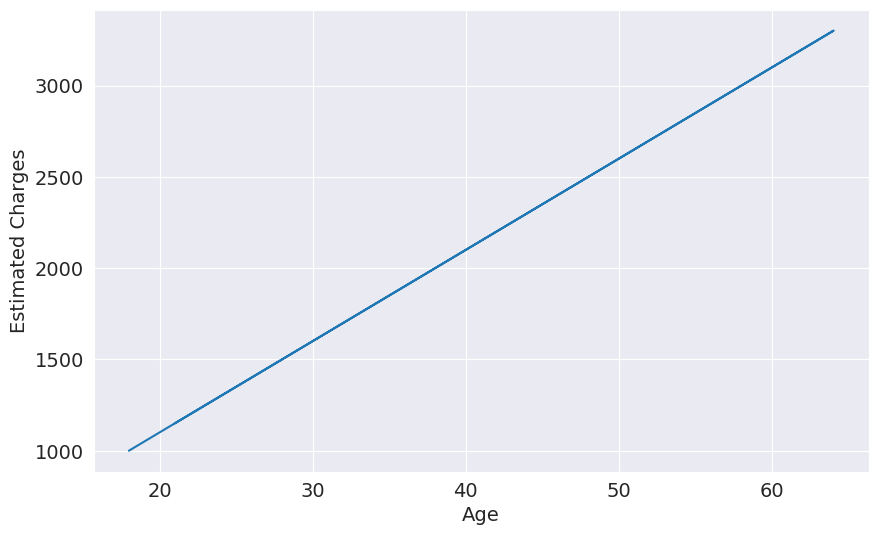

In [ ]:
plt.plot(ages,estimated_charges);
plt.xlabel('Age');
plt.ylabel('Estimated Charges');


As expected , the points lie on a straight line.

we can overlay this line on the actual data, so see how ell our model fits the data

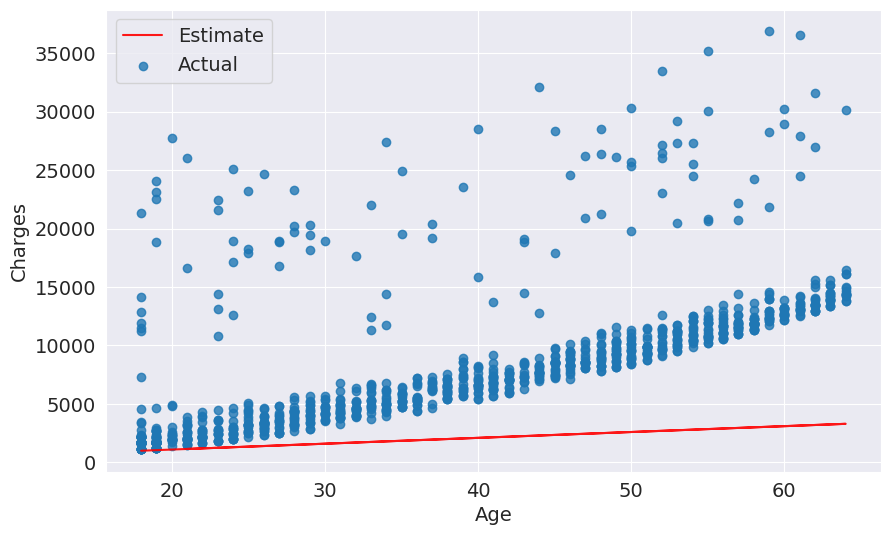

In [ ]:
target = non_smoker_df.charges

plt.plot(ages,estimated_charges,'r',alpha=0.9);

plt.scatter(ages,target,alpha=0.8);
plt.xlabel("Age");
plt.ylabel("Charges")

plt.legend(["Estimate","Actual"]);


Clearly, our estimates are poor and thne line doesnot fit the data. However , we can try different values of w and b to move the line around . lets defne a helper function try_parameters which takes w and b as inputs and create steh above plot

In [ ]:
def try_parameters(w,b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  estimated_charges = estimate_charges(ages,w,b)

  plt.plot(ages,estimated_charges,'r',alpha=0.9);
  plt.scatter(ages,target,s=8,alpha=0.8);
  plt.xlabel('Age');
  plt.ylabel('Charges')
  plt.legend(['Estimate','Actual'])

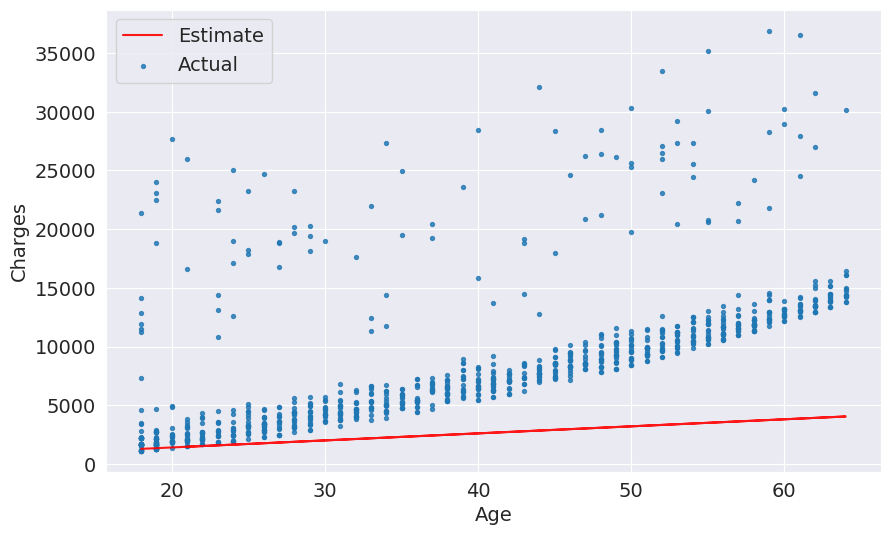

In [ ]:
try_parameters(60, 200)

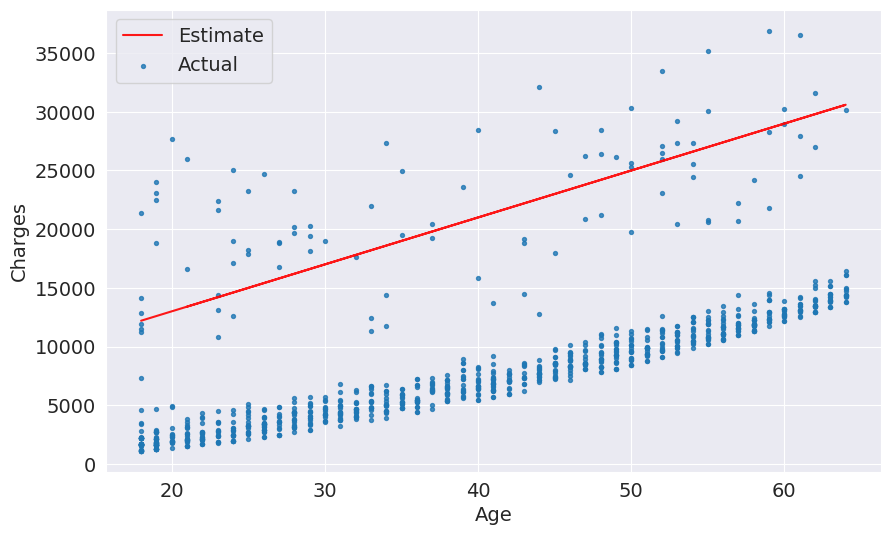

In [ ]:
try_parameters(400,5000) # that means bias should be decresed

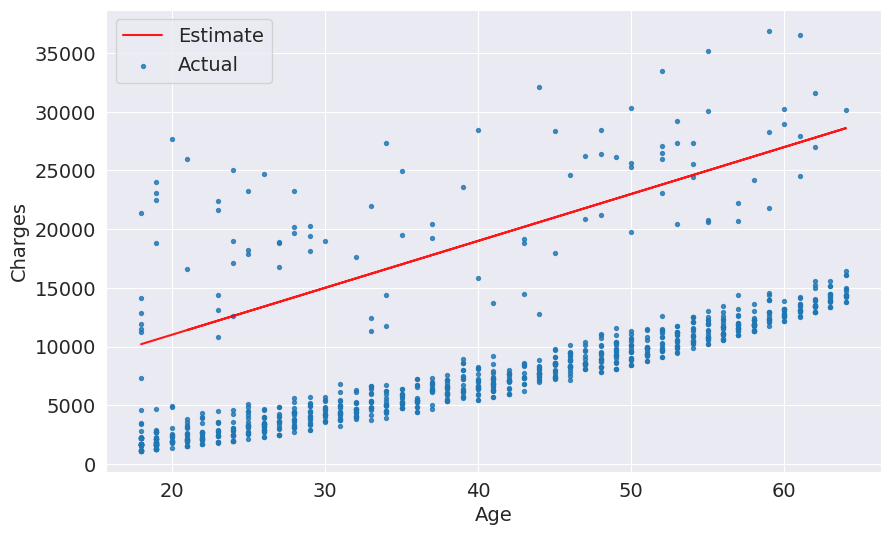

In [ ]:
try_parameters(400,3000)

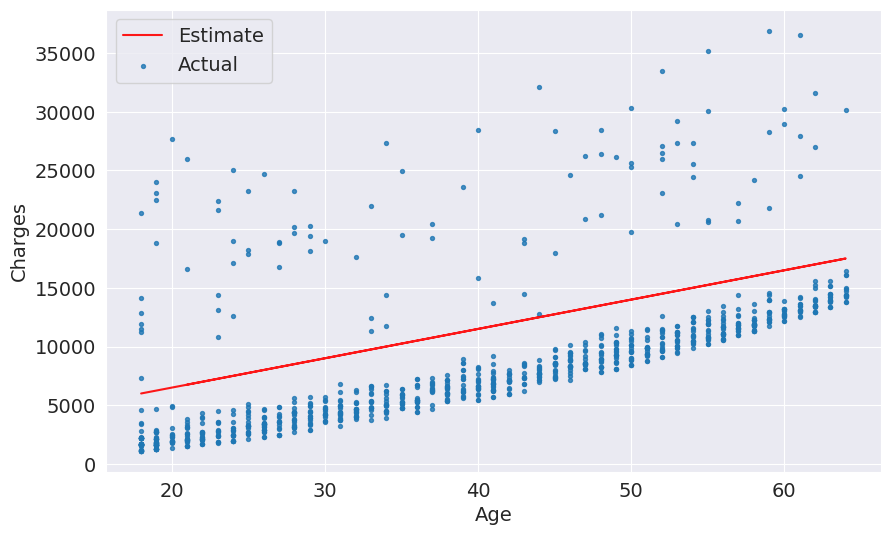

In [ ]:
try_parameters(250,1500)

As we change the values of w and b manually, trying to move the line visually closer to the points, we are learning the approximate relationship b/w age and charges

wouldn't it be nice if a computer could try several diff values of w and b and learn the relationship b/w age and charges? to do this, we need to solve couple of prblms.

1. We need a way to measure numerically how well line fits the points.

2. Once the measure of fit has been completed , we need a way to modify w and bto improve the fit

if we solve the above problemns, it hsould be possible for a computer to determune w and b for the best fit line, starting from a random guess.

# *Loss/Cost Function*

We can compare our model predictions with actual targets using the following method.

-> Calculate the diff b/w the targets and predictions (residual).

->Square all elements  to remove -ve values.

-> Cal the avg of elements in resulting matrix.

->take the sq root of result

The result is a single number , known as root mean squared error(RMSE).

In [ ]:
targets = non_smoker_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [ ]:
predictions = estimated_charges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [ ]:
# Compute RMSE
def rmse(targets,predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

In [ ]:
w = 50
b = 100

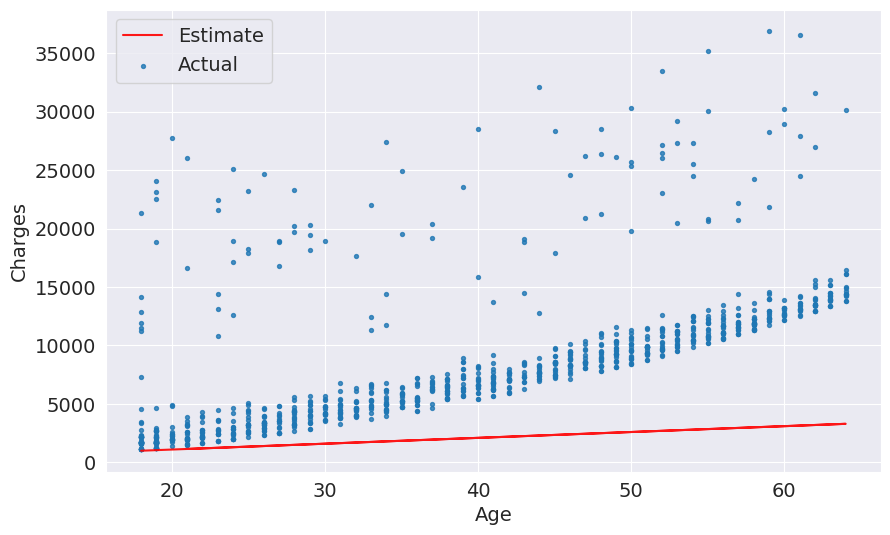

In [ ]:
try_parameters(w,b)

In [ ]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age,w,b)

In [ ]:
rmse(targets,predicted)

8461.949562575493

Here is how we can interpret the above number. On avg each element in th eprediction differs from the actual target by $ 8461.

The result is called as LOSS because it indicates how bad the model is at predicting the target variables. It represents info LOSS in the model: the lower the loss, the better the model.

lets modify the try_parameters fun to also display the loss

In [ ]:
def try_parameters(w,b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges
  predictions = estimate_charges(ages,w,b)

  plt.plot(ages,predictions,'r',alpha=0.9);
  plt.scatter(ages,target,s=8,alpha=0.8);
  plt.xlabel('Age');
  plt.ylabel('Charges')
  plt.legend(['Prediction','Actual']);

  loss = rmse(target, predictions)
  print("RMSE LOSS: ",loss)

RMSE LOSS:  8461.949562575493


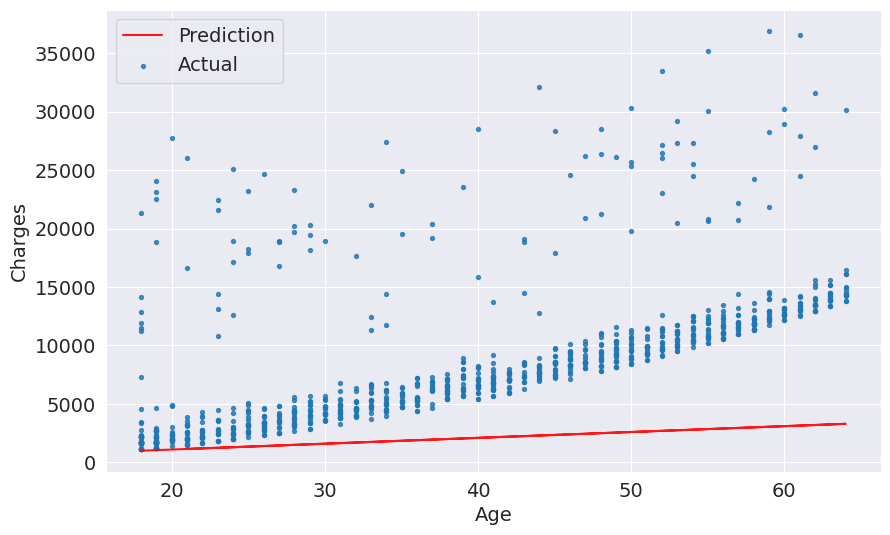

In [ ]:
try_parameters(50,100)

Try diff values of w and b to minimise rmse loss (may be by trial and error)

RMSE LOSS:  4991.993804156943


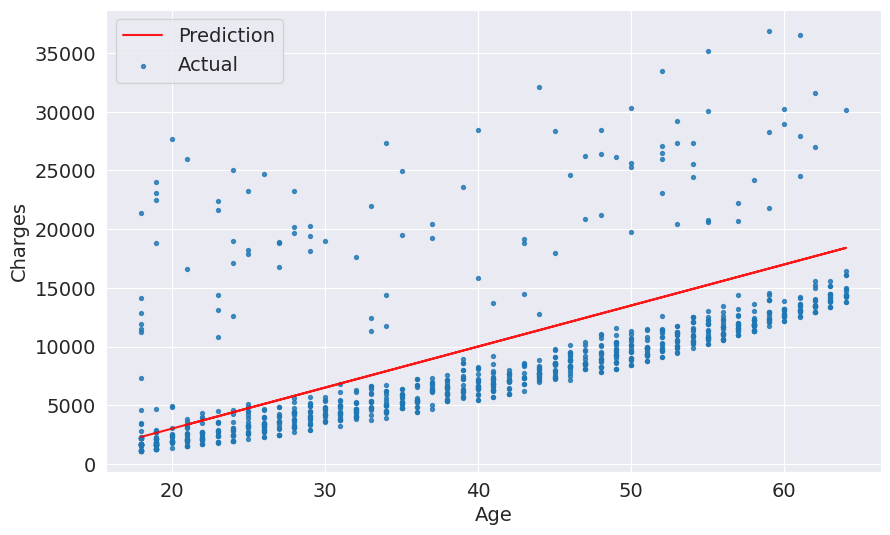

In [ ]:
try_parameters(350,-4000)

***Optimizer***

Next, we need a strategy to modify weights w and b to reduce the loss and improve the fit of the line to the data.

STRATEGIES:

-> ordinary least square: (small data sets) (using matrix operations)

->stochastic gradient descent: (large data sets) (using iterative approach)

# ***Linear Regression using Scikit-learn***

in practive , you will never need to implement either of the methods yourself. you can use a library called scikit-learn to do this for u

let us use the LinearRegression class from scikit-learn to find the best fit line for the age vs charges using the ordinary least square optimization technique

In [ ]:
from sklearn.linear_model import LinearRegression

fit method to find the best fit line for the inputs and targets

In [ ]:
 # new model object
 model = LinearRegression()

In [ ]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
inputs = non_smoker_df[['age']] # 2D know , it needs, check help above
targets = non_smoker_df['charges']
#check shapes
print('inputs shape: ',inputs.shape)
print('targets shape: ',targets.shape)


inputs shape:  (1064, 1)
targets shape:  (1064,)


lets fit the model to the data

In [ ]:
model.fit(inputs,targets) #loss and line is coded in it

LinearRegression()

We can now make predictions using teh model.lets predict the charges for the ages 3, 37, 61

In [ ]:
model.predict(np.array([[23],[37],[61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

compare them with scatter plot above

lets compute the predictions for the entire set of inputs

In [ ]:
predictions = model.predict(inputs)

In [ ]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

its not taht much bad, but fine

In [ ]:
rmse(targets,predictions)

4662.505766636395

seems like our prediction is off ny $4000 on avd. whichis not bad considering the afct that there are many outliers

the parameters are stored in coef_ and intercept_ properties

In [ ]:
model.coef_

array([267.24891283])

In [ ]:
model.intercept_

-2091.4205565650864

are tehse similar to your predictions, lets visualize

RMSE LOSS:  4662.505766636395


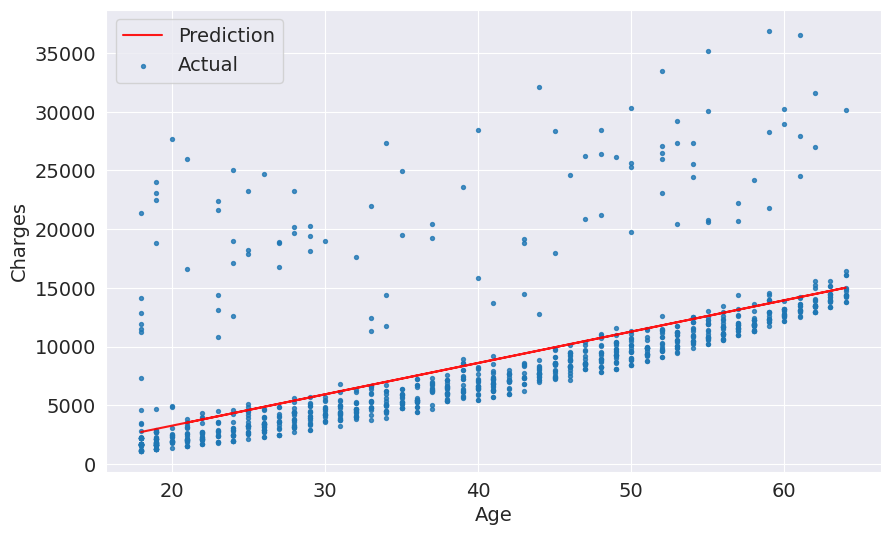

In [ ]:
try_parameters(model.coef_,model.intercept_)

indeed the line is quite close to the points. it is slighty above the cluster of points, beacuse its also trying to account for outliers

this class(linear regression ) uses ordinary least squares optimization techniques, but thre is another one called gradient decent

for that you ned to use SGDRegressor class from scikit-learn to train a model using this technique. make predictions and compute the loss, do you see any difference in the result

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
# new model object
model1 = SGDRegressor()

In [ ]:
help(model1.fit)

Help on method fit in module sklearn.linear_model._stochastic_gradient:

fit(X, y, coef_init=None, intercept_init=None, sample_weight=None) method of sklearn.linear_model._stochastic_gradient.SGDRegressor instance
    Fit linear model with Stochastic Gradient Descent.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}, shape (n_samples, n_features)
        Training data.
    
    y : ndarray of shape (n_samples,)
        Target values.
    
    coef_init : ndarray of shape (n_features,), default=None
        The initial coefficients to warm-start the optimization.
    
    intercept_init : ndarray of shape (1,), default=None
        The initial intercept to warm-start the optimization.
    
    sample_weight : array-like, shape (n_samples,), default=None
        Weights applied to individual samples (1. for unweighted).
    
    Returns
    -------
    self : object
        Fitted `SGDRegressor` estimator.



In [ ]:
inputs1 = non_smoker_df[['age']] # 2D know , it needs, check help above
targets1 = non_smoker_df['charges']
#check shapes
print('inputs shape: ',inputs1.shape)
print('targets shape: ',targets1.shape)


inputs shape:  (1064, 1)
targets shape:  (1064,)


In [ ]:
model1.fit(inputs1,targets1)

SGDRegressor()

In [ ]:
model1.predict(np.array([[23],[37],[61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SGDRegressor was fitted with feature names



array([ 6372.41263745,  9605.75357172, 15148.62374475])

In [ ]:
predictions1 = model1.predict(inputs1)

In [ ]:
targets1 = non_smoker_df.charges

In [ ]:
predictions1

array([5217.64801807, 7527.17725683, 8681.94187621, ..., 5217.64801807,
       5217.64801807, 5910.5067897 ])

In [ ]:
targets1

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [ ]:
rmse(predictions1,targets1)

4996.661340322837

In [ ]:
model1.coef_

array([230.95292388])

In [ ]:
model1.intercept_

array([1060.49538829])

RMSE LOSS:  4996.661340322837


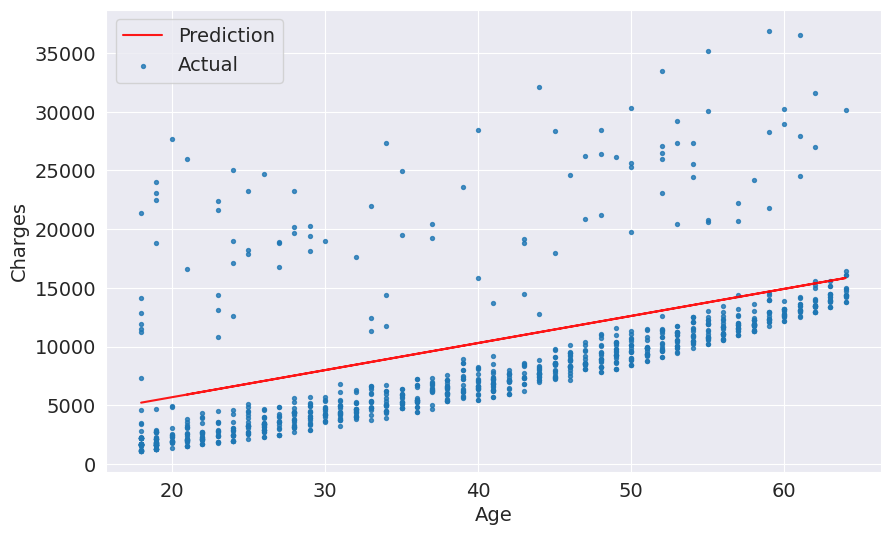

In [ ]:
try_parameters(model1.coef_,model1.intercept_)

# ***NOW YOU WORK FOR SMOKERS***

Machine learning is simply the processof computing the best parameters to model the relationship b/w some feature and targets

Every machine learning problem has three components:

1.Model

2.Cost Function

3.Optimizer

Every model has parameters, to understand how good the parameters are, we use cost function, lower cosr->better model, them optimization techniques to reduce the cost using it.




As we seen above, it takes just few lines of code to train a amchine learning model using scikit-learn

In [ ]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the data
loss = rmse(predictions,targets)
print("Loss: ",loss)

Loss:  4662.505766636395


# ***Linear Regression using Multiple Features***

so far, we have used on the age feature to estimate charges , adding another feature like bmi is fairly straightforward. we simply assume the following relationship

charges = w1 x age + w2 x bmi + b


not straight line, but like a plain , three D

In [ ]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age','bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the data
loss = rmse(predictions,targets)
print("Loss: ",loss)

Loss:  4662.3128354612945


as you see, there is no much difference, because there is no  uch correlation

In [ ]:
fig = px.scatter(non_smoker_df,x='bmi',y='charges',title='BMI vs charges')
fig.update_traces(marker_size=5)
fig.show()


In [ ]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

Clearly, BMI ahs a much lower weightage, and you can see why, it has tiny contribution, and even that is probably accidental. This is an important thing to keep in mind. you cannot find a relationship that doesnt exist: no matter what machine learning technique or optimization algorithm you apply.

Now we add one more feature children

charges = w1 x age + w2 x bmi + w3 x children + b

In [ ]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542192

In [ ]:
fig = px.strip(non_smoker_df,x='children',y='charges',title='BMI vs charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age','bmi','children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the data
loss = rmse(predictions,targets)
print("Loss: ",loss)

Loss:  4608.470405038247


In [ ]:
model.coef_, model.intercept_

(array([265.2938443 ,   5.27956313, 580.65965053]), -2809.2976032235892)

Use the same and train the model for smokers

and also without distinct , consider whole medical_df and train a model

Lets do for whole data medical_df

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# create inputs and targets
inputst, targetst = medical_df[['age','bmi','children']], medical_df['charges']

# create and train the model
modelt = LinearRegression()
modelt.fit(inputst, targetst)

# Generate predictions
predictionst = modelt.predict(inputst)

# Compute the loss and evalute the model
tloss = rmse(targetst,predictionst)
print('Total loss: ',tloss)

Total loss:  11355.317901125973


In [ ]:
px.scatter(medical_df, x='age',y='charges',color='smoker')

**USING CATEGORICAL FEATURES FOR MACHINE LEARNING**

if we could use categorical column like smoker , we can train a single model for entire dataset.

to do thsis, we simply need to convert them to numbers. There are 3 three common techniques :

1. if it has just 2 categories(it is called binary category). then we replace with 0,1.

2. if more than 2, we can perform one-hot encoding i.e, create a new coloumn for each category with 1s and 0s.

3. If it has natural order(e.g cold, neutral, warm, hot) then converted to 1,2,3,4 preserving the oreder.

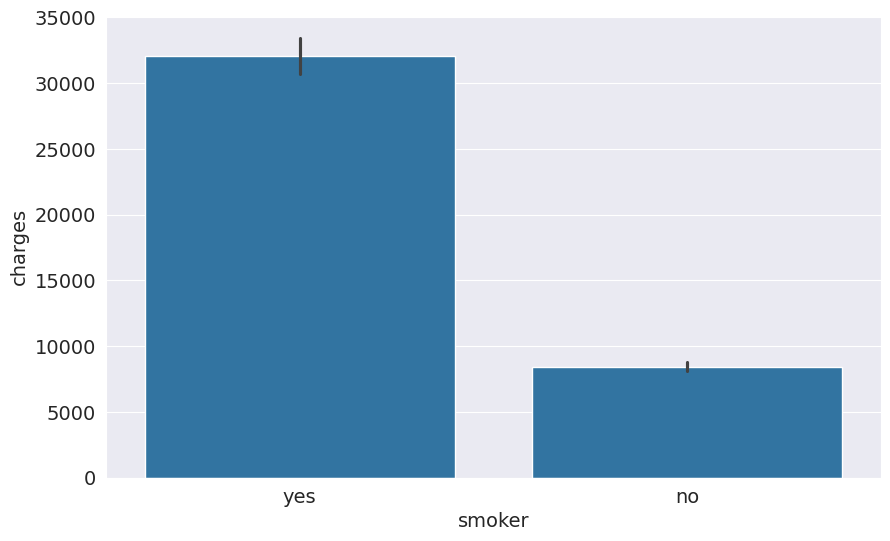

In [ ]:
sns.barplot(data=medical_df,x='smoker',y='charges');


In [ ]:
smoker_code = {'yes':1,'no':0}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_code)

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [ ]:
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

Now we use the smoker_df for linear regression

In [ ]:
# create inputs and targets
inputst, targetst = medical_df[['age','bmi','children','smoker_code']], medical_df['charges']

# create and train the model
modelt = LinearRegression()
modelt.fit(inputst, targetst)

# Generate predictions
predictionst = modelt.predict(inputst)

# Compute the loss and evalute the model
tloss = rmse(targetst,predictionst)
print('Total loss: ',tloss)

Total loss:  6056.439217188081


In [ ]:
sex_code = {'female':1,'male':0}
medical_df['sex_code'] = medical_df.sex.map(sex_code)

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,1
1,18,male,33.770,1,no,southeast,1725.55230,0,0
2,28,male,33.000,3,no,southeast,4449.46200,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1
1335,18,female,36.850,0,no,southeast,1629.83350,0,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1


In [ ]:
# create inputs and targets
inputst, targetst = medical_df[['age','bmi','children','smoker_code','sex_code']], medical_df['charges']

# create and train the model
modelt = LinearRegression()
modelt.fit(inputst, targetst)

# Generate predictions
predictionst = modelt.predict(inputst)

# Compute the loss and evalute the model
tloss = rmse(targetst,predictionst)
print('Total loss: ',tloss)

Total loss:  6056.100708754546


# ***One-hot Encoding***

The region coloumn contains 4 values, so we will need to use hot encoding and create a new coloumn for each region

<ipython-input-103-ef288cc3a743>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='region', ylabel='charges'>

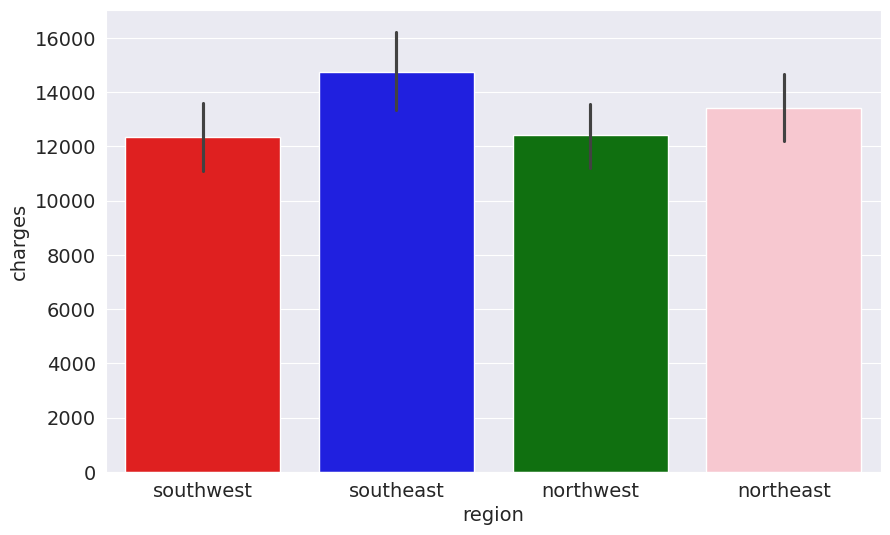

In [ ]:
colors=['red','blue','green','pink']
sns.barplot(data=medical_df,x='region',y='charges',palette=colors)

In [ ]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
enc.transform([['northeast']]).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.]])

In [ ]:
enc.transform([['northwest'],['southeast'],['southwest']]).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [ ]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot


array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
medical_df[['northeast','northwest','southeast','southwest']] = one_hot

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0.0,0.0,0.0,1.0


In [ ]:
# create inputs and targets
inputst, targetst = medical_df[['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']], medical_df['charges']

# create and train the model
modelt = LinearRegression()
modelt.fit(inputst, targetst)

# Generate predictions
predictionst = modelt.predict(inputst)

# Compute the loss and evalute the model
tloss = rmse(targetst,predictionst)
print('Total loss: ',tloss)

Total loss:  6041.6796511744515


# ***Model Improvements***

let's dicuss and apply some more improvements to our model

**Feature Scaling**

Recall that due to regulatory requirements, we also need to explain the rationale behind the predictions our model.



In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   smoker_code  1338 non-null   int64  
 8   sex_code     1338 non-null   int64  
 9   northeast    1338 non-null   float64
 10  northwest    1338 non-null   float64
 11  southeast    1338 non-null   float64
 12  southwest    1338 non-null   float64
dtypes: float64(6), int64(4), object(3)
memory usage: 136.0+ KB


In [ ]:
# medical_df[input_cols].loc[10]

In [ ]:
modelt.predict([[28,30,2,1,0,0,1,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([29744.5002766])

Someone will ask , why my charges is this much, so check the coefficients because

charges = w1 x age..........

In [ ]:
modelt.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
         131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [ ]:
modelt.intercept_

-12656.862170590564

In [ ]:
input_cols = ['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']

In [ ]:
# input_cols.info()

In [ ]:
print("Length of input_cols:", len(input_cols))
print("Length of modelt.coef_:", len(modelt.coef_))

Length of input_cols: 9
Length of modelt.coef_: 9


In [ ]:
weights_df = pd.DataFrame({'feature':np.append(input_cols, 1),
                           'weight': np.append(modelt.coef_,modelt.intercept_)
                           })
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12656.862171


While it seems like BMI and the northeast have  a higher weight than age, keep in mind that the range of values for BMI is limited(15 to 40) and the noreast column only takes the values 0 and 1.

Brecause diffrent cols have diff ranges , we can run intto two issues:

1. We can't compare the weights of diffrent col to identify which features are important.

2. A col with a larger range of inputs may disproportionally affect the loss and dominate the optimization process.

For this reason, its common practice to scale (or standatization) th values in numeric col by subtracting the mean and divinding by the standard deviation.

standardisation: x=(z-u)/sigma



In [ ]:
 from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_cols = ['age','bmi','children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [ ]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [ ]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

Now we can scale the data as follows

In [ ]:
medical_df[numeric_cols]

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [ ]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

these can now we combined with the categorical data

In [ ]:
cat_cols = ['smoker_code','sex_code','northeast','northwest','southeast','southwest']
categorical_data = medical_df[cat_cols].values

In [ ]:
 inputs = np.concatenate((scaled_inputs, categorical_data),axis=1)
 targets = medical_df.charges

 model = LinearRegression().fit(inputs,targets)

 predictions = model.predict(inputs)

 loss = rmse(targets, predictions)
 print("Loss: ",loss)

Loss:  6041.6796511744515


In [ ]:
from os import waitid
waitid

<function posix.waitid(idtype, id, options, /)>

In [ ]:
model.coef_

array([ 3607.47273619,  2067.69196584,   572.99820995, 23848.53454191,
         131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight',ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8335.168856
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [ ]:
new_customers = [[28,30,2,1,0,0,1,0,0]]

In [ ]:
scaler.transform([[28,30,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [ ]:
model.predict([[28,30,2,1,0,0,1,0,0]])

array([196603.74074217])

In [ ]:
model.predict([[-0.79795355, -0.10882659,  0.75107928,1,0,0,1,0,0]])

array([29744.50027431])

In [ ]:
print("Scaled Inputs Shape: ", scaled_inputs.shape)
print("Categorical Data Shape: ", categorical_data.shape)
print("Combined Inputs Shape: ", inputs.shape)

Scaled Inputs Shape:  (1338, 3)
Categorical Data Shape:  (1338, 6)
Combined Inputs Shape:  (1338, 9)


# ***How to approach a Machine Learning Problem***

1. Explore the data and find the correlations b/w inputs and targets.

2. Pick the right model, loss functions and optimizer for the problem at hand

3. Scale numeric variables and one-hot encode categorical data.

4. Set aside a tets set (using a fraction of the training model).

5. Train the model.

6. Make predictions on the test set and compute the loss.

***Creating a test set***

Models like the one we ahve created in this tutorial are designed to be used in the real world. it is common practice to set aside a small fraction of teh data(e.g 10%) just for testing and reporting the results of the model.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs,targets,test_size=0.1)

In [ ]:
model = LinearRegression().fit(inputs_train,targets_train)
predictions_test = model.predict(inputs_test)
loss = rmse(targets_test,predictions_test)
print('Test Loss: ',loss)

Test Loss:  5718.521957475198


In [ ]:
predictions_train = model.predict(inputs_train)
loss = rmse(targets_train,predictions_train)
print('Training Loss: ',loss)

Training Loss:  6079.359242328086
